In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from tqdm import tqdm

In [ ]:
classes = os.listdir("/content/drive/MyDrive/AnimalClassification model/Train")
print(classes)

['Deer', 'Elephant', 'Fox', 'Horse', 'Leopard', 'Lion', 'Monkey', 'Otter', 'Rabbit', 'Tiger', 'Wolf', 'Cheetah']


In [ ]:
# Define transforms for data augmentation
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load the datasets
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/AnimalClassification model/Train_small', transform=train_transforms)
test_dataset = datasets.ImageFolder('/content/drive/MyDrive/AnimalClassification model/Test_small', transform=test_transforms)

# Create the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

# Define the classes

classes = os.listdir("/content/drive/MyDrive/AnimalClassification model/Train_small")


In [ ]:
class AnimalCNN(nn.Module):
    def __init__(self):
        super(AnimalCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512,12)
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = AnimalCNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [ ]:
train_losses = []
train_accuracies = []

In [ ]:
num_epochs=70
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(tqdm(train_loader)):
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate and append loss and accuracy values for this epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    # Print loss and accuracy for this epoch
    print(f"Epoch {epoch+1} Loss: {epoch_loss:.4f} Accuracy: {epoch_accuracy:.2f}%")

100%|██████████| 19/19 [00:36<00:00,  1.91s/it]


Epoch 1 Loss: 1.7665 Accuracy: 40.83%


100%|██████████| 19/19 [00:37<00:00,  1.95s/it]


Epoch 2 Loss: 1.6783 Accuracy: 43.00%


100%|██████████| 19/19 [00:38<00:00,  2.04s/it]


Epoch 3 Loss: 1.5458 Accuracy: 48.50%


100%|██████████| 19/19 [00:35<00:00,  1.86s/it]


Epoch 4 Loss: 1.4293 Accuracy: 53.83%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 5 Loss: 1.3743 Accuracy: 55.00%


100%|██████████| 19/19 [00:37<00:00,  1.96s/it]


Epoch 6 Loss: 1.2936 Accuracy: 56.00%


100%|██████████| 19/19 [00:35<00:00,  1.88s/it]


Epoch 7 Loss: 1.1714 Accuracy: 61.00%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 8 Loss: 1.1481 Accuracy: 62.00%


100%|██████████| 19/19 [00:37<00:00,  1.96s/it]


Epoch 9 Loss: 1.0161 Accuracy: 67.00%


100%|██████████| 19/19 [00:35<00:00,  1.89s/it]


Epoch 10 Loss: 0.9692 Accuracy: 66.00%


100%|██████████| 19/19 [00:37<00:00,  1.99s/it]


Epoch 11 Loss: 0.9012 Accuracy: 69.00%


100%|██████████| 19/19 [00:37<00:00,  1.95s/it]


Epoch 12 Loss: 0.8296 Accuracy: 73.83%


100%|██████████| 19/19 [00:36<00:00,  1.90s/it]


Epoch 13 Loss: 0.7977 Accuracy: 72.83%


100%|██████████| 19/19 [00:38<00:00,  2.03s/it]


Epoch 14 Loss: 0.7399 Accuracy: 76.00%


100%|██████████| 19/19 [00:37<00:00,  1.95s/it]


Epoch 15 Loss: 0.7278 Accuracy: 77.50%


100%|██████████| 19/19 [00:36<00:00,  1.90s/it]


Epoch 16 Loss: 0.6602 Accuracy: 77.83%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 17 Loss: 0.5837 Accuracy: 79.83%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 18 Loss: 0.5683 Accuracy: 80.83%


100%|██████████| 19/19 [00:34<00:00,  1.84s/it]


Epoch 19 Loss: 0.5009 Accuracy: 83.33%


100%|██████████| 19/19 [00:35<00:00,  1.88s/it]


Epoch 20 Loss: 0.4551 Accuracy: 87.17%


100%|██████████| 19/19 [00:34<00:00,  1.82s/it]


Epoch 21 Loss: 0.4639 Accuracy: 83.83%


100%|██████████| 19/19 [00:37<00:00,  1.99s/it]


Epoch 22 Loss: 0.4284 Accuracy: 87.83%


100%|██████████| 19/19 [00:37<00:00,  1.99s/it]


Epoch 23 Loss: 0.4065 Accuracy: 87.67%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 24 Loss: 0.3099 Accuracy: 90.83%


100%|██████████| 19/19 [00:38<00:00,  2.01s/it]


Epoch 25 Loss: 0.3066 Accuracy: 89.00%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 26 Loss: 0.3042 Accuracy: 89.83%


100%|██████████| 19/19 [00:34<00:00,  1.83s/it]


Epoch 27 Loss: 0.3369 Accuracy: 88.67%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 28 Loss: 0.2966 Accuracy: 91.00%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 29 Loss: 0.2493 Accuracy: 92.67%


100%|██████████| 19/19 [00:37<00:00,  1.96s/it]


Epoch 30 Loss: 0.2078 Accuracy: 93.67%


100%|██████████| 19/19 [00:36<00:00,  1.93s/it]


Epoch 31 Loss: 0.1740 Accuracy: 95.67%


100%|██████████| 19/19 [00:35<00:00,  1.89s/it]


Epoch 32 Loss: 0.1566 Accuracy: 94.83%


100%|██████████| 19/19 [00:36<00:00,  1.91s/it]


Epoch 33 Loss: 0.1825 Accuracy: 94.00%


100%|██████████| 19/19 [00:36<00:00,  1.91s/it]


Epoch 34 Loss: 0.1573 Accuracy: 94.67%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 35 Loss: 0.1368 Accuracy: 96.50%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 36 Loss: 0.1092 Accuracy: 96.50%


100%|██████████| 19/19 [00:36<00:00,  1.90s/it]


Epoch 37 Loss: 0.1021 Accuracy: 97.33%


100%|██████████| 19/19 [00:35<00:00,  1.89s/it]


Epoch 38 Loss: 0.0999 Accuracy: 97.33%


100%|██████████| 19/19 [00:36<00:00,  1.93s/it]


Epoch 39 Loss: 0.0781 Accuracy: 98.33%


100%|██████████| 19/19 [00:36<00:00,  1.91s/it]


Epoch 40 Loss: 0.0690 Accuracy: 99.00%


100%|██████████| 19/19 [00:38<00:00,  2.01s/it]


Epoch 41 Loss: 0.0834 Accuracy: 98.17%


100%|██████████| 19/19 [00:35<00:00,  1.89s/it]


Epoch 42 Loss: 0.0850 Accuracy: 97.50%


100%|██████████| 19/19 [00:37<00:00,  1.95s/it]


Epoch 43 Loss: 0.0747 Accuracy: 97.83%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 44 Loss: 0.0575 Accuracy: 98.67%


100%|██████████| 19/19 [00:36<00:00,  1.90s/it]


Epoch 45 Loss: 0.0536 Accuracy: 98.50%


100%|██████████| 19/19 [00:35<00:00,  1.85s/it]


Epoch 46 Loss: 0.0506 Accuracy: 98.67%


100%|██████████| 19/19 [00:37<00:00,  1.99s/it]


Epoch 47 Loss: 0.0485 Accuracy: 99.00%


100%|██████████| 19/19 [00:36<00:00,  1.93s/it]


Epoch 48 Loss: 0.0454 Accuracy: 98.50%


100%|██████████| 19/19 [00:37<00:00,  1.95s/it]


Epoch 49 Loss: 0.0439 Accuracy: 99.17%


100%|██████████| 19/19 [00:36<00:00,  1.93s/it]


Epoch 50 Loss: 0.0515 Accuracy: 98.50%


100%|██████████| 19/19 [00:36<00:00,  1.93s/it]


Epoch 51 Loss: 0.0911 Accuracy: 97.83%


100%|██████████| 19/19 [00:38<00:00,  2.00s/it]


Epoch 52 Loss: 0.0826 Accuracy: 97.83%


100%|██████████| 19/19 [00:36<00:00,  1.93s/it]


Epoch 53 Loss: 0.0660 Accuracy: 98.17%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 54 Loss: 0.0676 Accuracy: 97.67%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 55 Loss: 0.0545 Accuracy: 98.33%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 56 Loss: 0.0477 Accuracy: 99.17%


100%|██████████| 19/19 [00:38<00:00,  2.01s/it]


Epoch 57 Loss: 0.0470 Accuracy: 98.83%


100%|██████████| 19/19 [00:36<00:00,  1.90s/it]


Epoch 58 Loss: 0.0474 Accuracy: 98.50%


100%|██████████| 19/19 [00:36<00:00,  1.93s/it]


Epoch 59 Loss: 0.0274 Accuracy: 99.83%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 60 Loss: 0.0226 Accuracy: 99.83%


100%|██████████| 19/19 [00:36<00:00,  1.90s/it]


Epoch 61 Loss: 0.0229 Accuracy: 99.33%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 62 Loss: 0.0207 Accuracy: 99.33%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 63 Loss: 0.0132 Accuracy: 99.83%


100%|██████████| 19/19 [00:35<00:00,  1.84s/it]


Epoch 64 Loss: 0.0124 Accuracy: 100.00%


100%|██████████| 19/19 [00:36<00:00,  1.94s/it]


Epoch 65 Loss: 0.0164 Accuracy: 99.67%


100%|██████████| 19/19 [00:35<00:00,  1.85s/it]


Epoch 66 Loss: 0.0147 Accuracy: 100.00%


100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


Epoch 67 Loss: 0.0160 Accuracy: 99.83%


100%|██████████| 19/19 [00:38<00:00,  2.02s/it]


Epoch 68 Loss: 0.0218 Accuracy: 99.50%


100%|██████████| 19/19 [00:36<00:00,  1.93s/it]


Epoch 69 Loss: 0.0301 Accuracy: 99.00%


100%|██████████| 19/19 [00:36<00:00,  1.91s/it]

Epoch 70 Loss: 0.0220 Accuracy: 99.50%


In [ ]:
PATH="/content/drive/MyDrive/123/acnn2_db.pth"
torch.save(model.state_dict(), PATH)


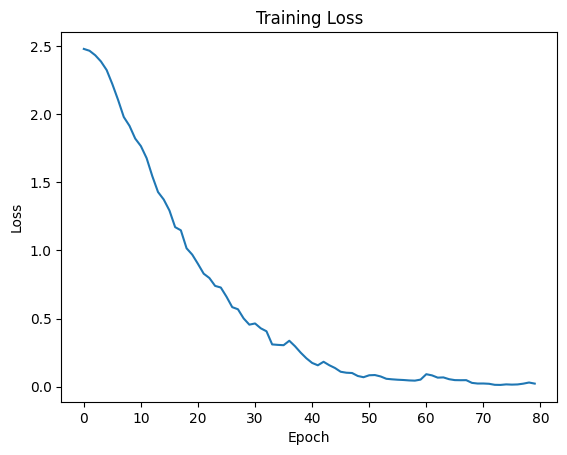

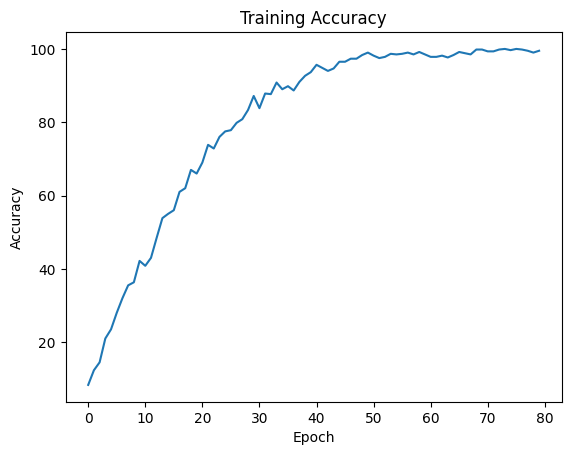

In [ ]:
%matplotlib inline
# Plot loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot accuracy
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
correct = 0
total = 0j
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f"Accuracy on test set: {100 * correct / total}")


100%|██████████| 4/4 [00:44<00:00, 11.03s/it]

Accuracy on test set: (50.833333333333336+0j)
